In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from definitions import ROOT_DIR
from unc.utils import load_info

In [3]:
sr_path = Path(ROOT_DIR, 'results', 'sr')
r_path = Path(ROOT_DIR, 'results', 'r')
def moving_avg(x, mode='valid', w=100):
    return np.convolve(x, np.ones(w), mode=mode) / w

In [38]:
w = 100

In [39]:
def process_dir(dir_path, key="reward", w=100, trunc=10000):
    all_results = []
    for f in dir_path.iterdir():
        info = load_info(f)
        result = moving_avg(info[key][:trunc], w=w)
#         result = info[key][:trunc]
        all_results.append(result)

    data = np.array(all_results)
    return data


In [28]:
sr_data = process_dir(sr_path, w=w)
r_data = process_dir(r_path, w=w)

In [42]:
all_data = [('State + reward', sr_data, 'blue'), ('Reward only', r_data, 'orange')]

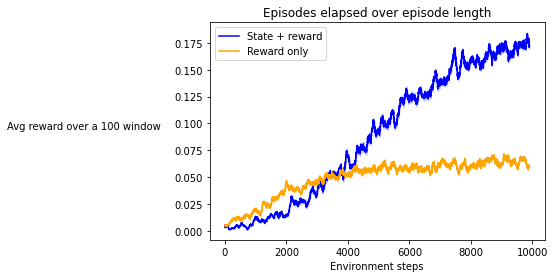

In [43]:
x = np.arange(sr_data.shape[1])
fig, ax = plt.figure(), plt.axes()


for key, data, color in all_data:
    means = data.mean(axis=0)
    std_err = data.std(axis=0) / data.shape[0]

    ax.plot(x, means, label=key, color=color)
    plt.fill_between(x, means - std_err, means + std_err,
                         color=color, alpha=0.2)

ax.set_xlabel('Environment steps')
ax.set_ylabel(f"Avg reward over a {w} window", rotation=0, labelpad=90)
ax.set_title('Episodes elapsed over episode length')
plt.legend()

In [41]:
std_err

array([0.00039189, 0.00039189, 0.00039205, ..., 0.00076731, 0.00074998,
       0.00075882])